Javier Díaz Machado 24_25


In [448]:
import pandas as pd 
# Cargar el archivo CSV 
df = pd.read_csv('.\\dataset_full.csv')
# df = pd.read_csv('dataset_small.csv')
df

,qty_dot_url,qty_hyphen_url,qty_underline_url,qty_slash_url,qty_questionmark_url,qty_equal_url,qty_at_url,qty_and_url,qty_exclamation_url,qty_space_url,...,qty_ip_resolved,qty_nameservers,qty_mx_servers,ttl_hostname,tls_ssl_certificate,qty_redirects,url_google_index,domain_google_index,url_shortened,phishing
0,3,0,0,1,0,0,0,0,0,0,...,1,2,0,892,0,0,0,0,0,1
1,5,0,1,3,0,3,0,2,0,0,...,1,2,1,9540,1,0,0,0,0,1
2,2,0,0,1,0,0,0,0,0,0,...,1,2,3,589,1,0,0,0,0,0
3,4,0,2,5,0,0,0,0,0,0,...,1,2,0,292,1,0,0,0,0,1
4,2,0,0,0,0,0,0,0,0,0,...,1,2,1,3597,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
88642,3,1,0,0,0,0,0,0,0,0,...,1,3,1,3597,0,0,0,0,0,0
88643,2,0,0,0,0,0,0,0,0,0,...,1,2,2,591,0,2,0,0,0,0
88644,2,1,0,5,0,0,0,0,0,0,...,1,2,5,14391,1,0,0,0,0,1
88645,2,0,0,1,0,0,0,0,0,0,...,1,1,1,52,1,0,0,0,0,1


In [449]:
# separamos datos de entrada y salida
X_df = df.drop('phishing', axis=1)
y_df = df['phishing']
# separamos train y test
from sklearn.model_selection import train_test_split
Xtrain, Xtest, ytrain, ytest = train_test_split(X_df, y_df, test_size=0.2, random_state=2)
print(ytrain.shape, ytest.shape)

(70917,) (17730,)


In [450]:
# 1. elegimos clasificador
from sklearn.naive_bayes import CategoricalNB, BernoulliNB, MultinomialNB,	GaussianNB, ComplementNB
# 2. instanciamos el modelo
model = GaussianNB()
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
print(model.__class__.__name__)
for column in Xtrain.columns:
	Xtrain[column] = label_encoder.fit_transform(Xtrain[column])
	# Apply label encoding to each column in Xtrain
for column in Xtest.columns:
	Xtest[column] = label_encoder.fit_transform(Xtest[column])
	# Now you can fit your model
model.fit(Xtrain, ytrain)

GaussianNB


GaussianNB()

In [451]:
model.class_count_ # Muestra el núemro de ejemplares/valores para cada una de las clases

array([46396., 24521.])

In [452]:
model.classes_
y_column_values = model.classes_.tolist() #obtenemos todos los valores posibles de la columna y
print(y_column_values)

[0, 1]


In [453]:
# 4. Predicción con nuevos datos
y_model = model.predict(Xtest)

In [454]:
# 5 evaluación
from sklearn.metrics import accuracy_score
accuracy_score(ytest, y_model) # Precisión del modelo

0.9074450084602369

In [455]:
# Y finalmente visualizamos la Matriz de Confusión, para lo que se crea la siguiente función, que se llamará más adeante

from sklearn.metrics import confusion_matrix
from sklearn.utils.multiclass import unique_labels
import matplotlib.pyplot as plt

# y_true : dataframe   -> Los valores de las clases que son ciertos (test)
# y_pred : ndarray     -> Los valores calcuylados de las clases después de realizar la predicción
# class  : ndarray     -> Los nombres de las clases/valores objetivos

def plot_confusion_matrix(y_true, y_pred, classes,
                          normalize=False,
                          title=None,
                          cmap=plt.cm.Blues,
                          titleSup=None):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if not title:
        if normalize:
            title = 'Normalized confusion matrix'
        else:
            title = 'Confusion matrix, without normalization'

    # Compute confusion matrix
    cm = confusion_matrix(y_true, y_pred)
    # Only use the labels that appear in the data
    classes = classes[unique_labels(y_true, y_pred)]
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    fig, ax = plt.subplots()
    im = ax.imshow(cm, interpolation='nearest', cmap=cmap)
    ax.figure.colorbar(im, ax=ax)
    # We want to show all ticks...
    ax.set(xticks=np.arange(cm.shape[1]),
           yticks=np.arange(cm.shape[0]),
           # ... and label them with the respective list entries
           xticklabels=classes, yticklabels=classes,
           title=title,
           ylabel='True label',
           xlabel='Predicted label')

    # Rotate the tick labels and set their alignment.
    plt.setp(ax.get_xticklabels(), rotation=45, ha="right",
             rotation_mode="anchor")

    # Loop over data dimensions and create text annotations.
    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i in range(cm.shape[0]):
        for j in range(cm.shape[1]):
            ax.text(j, i, format(cm[i, j], fmt),
                    ha="center", va="center",
                    color="white" if cm[i, j] > thresh else "black")
    fig.tight_layout()
    fig.suptitle(titleSup, fontsize=16, y=1, ha='center')
    return ax

In [456]:
# Transformamos variables categóricas a valores numéricos/enteros para llamar a la función que pinta la matriz de confusión plot_confusion_matrix()
ytest_df= ytest.to_frame()
ytest_df

,phishing
6446,0
53538,0
21712,1
15296,0
18102,1
...,...
35301,0
47696,1
13913,0
72468,0


Confusion matrix, without normalization
[[10339  1265]
 [  376  5750]]


<Axes: title={'center': 'Normalized confusion matrix'}, xlabel='Predicted label', ylabel='True label'>

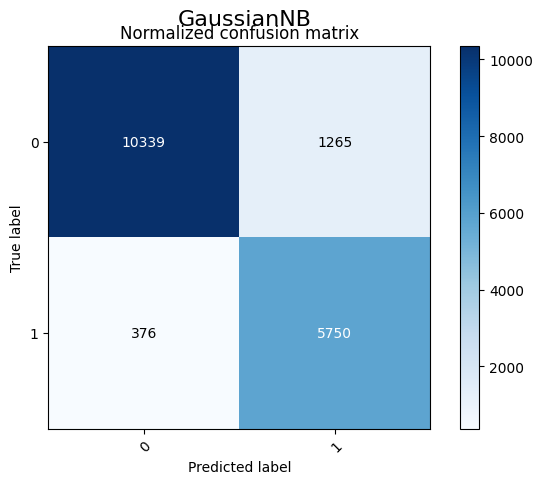

In [457]:
import numpy as np
# Creamos este array porque es el parámetro con las clases que espera la función
clases_phishing = np.array(y_column_values)
plot_confusion_matrix(
    ytest_df['phishing'], y_model, classes=clases_phishing, normalize=False, title='Normalized confusion matrix', titleSup=model.__class__.__name__)